In [14]:
#Exploratory Data Analysis

#Summary Statistics 

#Load datasets 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#fueleco_raw = pd.read_csv(r"C:\Users\Kyle\OneDrive\Desktop\python\pandas_data\college.csv") #PC
fueleco_raw = pd.read_csv("/Users/kylejohnson/Desktop/Python Files/python/Portfolio_Files/pd_cookbook_data/vehicles.csv.zip") 
fueleco = fueleco_raw.copy()

#Call individula summary statistics like
# .mean, .std, .quantile
fueleco.mean(numeric_only = True)
fueleco.std(numeric_only = True)
#fueleco.quantile()

#Call the .describe() method
fueleco.describe().T

#To get summary of all use include objects 
fueleco.describe(include = object).T

/var/folders/m8/j9f34b0132b375sgqgzj51240000gn/T/ipykernel_9670/930054445.py:12: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  fueleco_raw = pd.read_csv("/Users/kylejohnson/Desktop/Python Files/python/Portfolio_Files/pd_cookbook_data/vehicles.csv.zip")


,count,unique,top,freq
drive,37912,7,Front-Wheel Drive,13653
eng_dscr,23431,545,(FFS),8827
fuelType,39101,14,Regular,25620
fuelType1,39101,6,Regular Gasoline,26931
make,39101,134,Chevrolet,3900
model,39101,3816,F150 Pickup 2WD,214
mpgData,39101,2,N,26400
trany,39090,37,Automatic 4-spd,11045
VClass,39101,34,Compact Cars,5661
guzzler,2335,3,G,1356


In [ ]:
#Column Types

#Insect the dtypes
fueleco.dtypes

#Saving memory by converting floats to to int 
# but lose some percision
fueleco.select_dtypes("int64").describe().T
#city and comb08 don't go above 150

fueleco[["city08","comb08"]].info(memory_usage = "deep")

#Changing types to save memory
(
    fueleco[['city08','comb08']]
    .assign(
        city08 = fueleco.city08.astype("int16"),
        comb08 = fueleco.comb08.astype("int16")
    )
    .info(memory_usage = 'deep')
)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39101 entries, 0 to 39100
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   city08  39101 non-null  int64
 1   comb08  39101 non-null  int64
dtypes: int64(2)
memory usage: 611.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39101 entries, 0 to 39100
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   city08  39101 non-null  int16
 1   comb08  39101 non-null  int16
dtypes: int16(2)
memory usage: 152.9 KB


city08
(5.999, 13.0]    5939
(19.0, 21.0]     4477
(14.0, 15.0]     4381
(17.0, 18.0]     3912
(16.0, 17.0]     3881
(15.0, 16.0]     3855
(21.0, 24.0]     3676
(24.0, 150.0]    3235
(13.0, 14.0]     2898
(18.0, 19.0]     2847
Name: count, dtype: int64

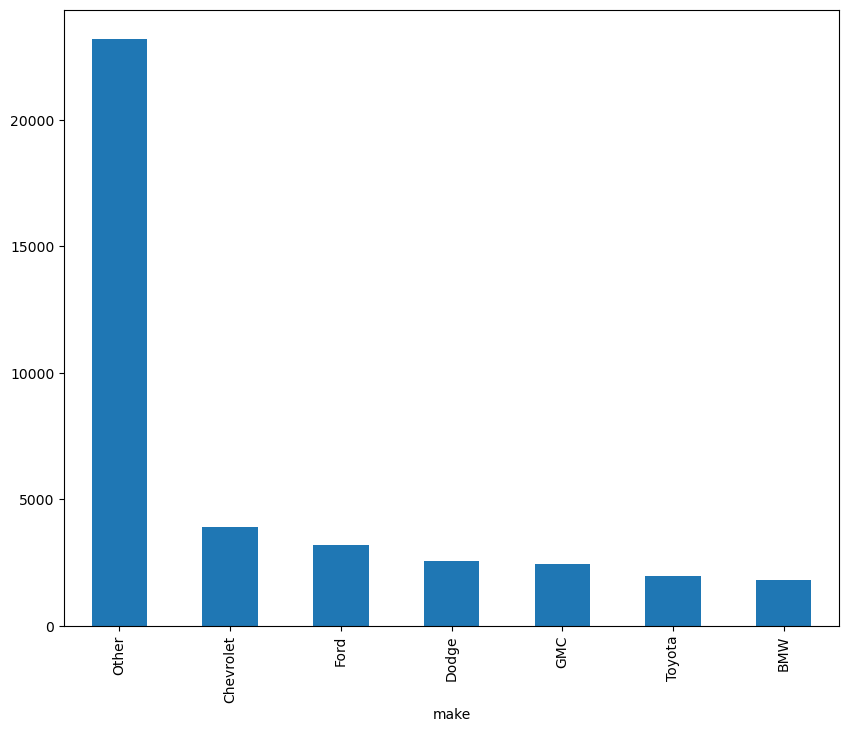

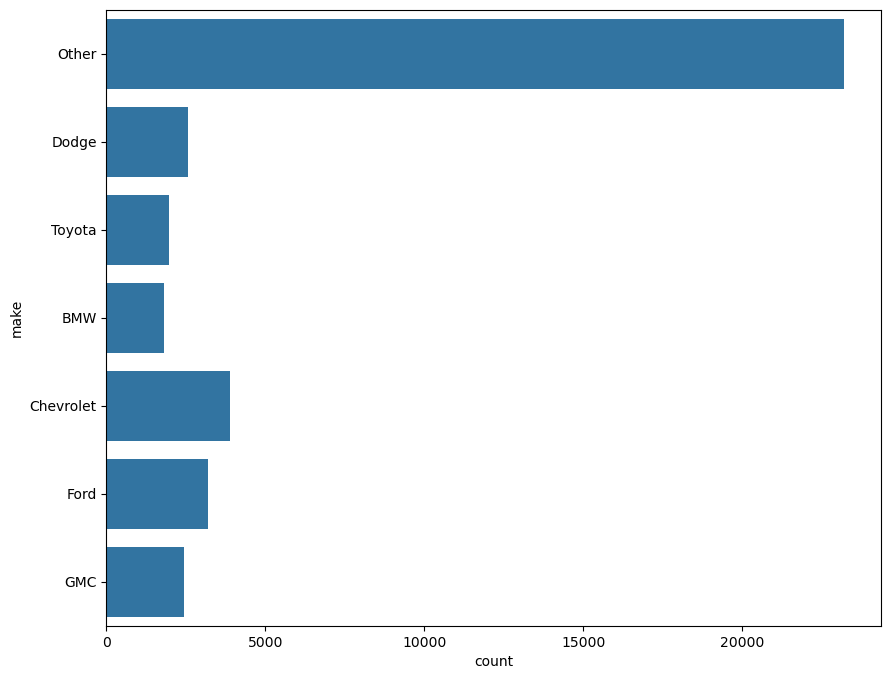

In [72]:
#Categorical Data

#Selecting only object columns
fueleco.select_dtypes(object).columns

#Use .nunique to determine cardinality
fueleco.drive.nunique()

#Use sample to see some of values
fueleco.drive.sample(5, random_state = 42)

#Determine the num. and perc. of missing values
fueleco.drive.isna().sum()
fueleco.drive.isna().mean() * 100

#Use value_counts method to summarize a column
fueleco.drive.value_counts()

#How to look at top 6 and collapse remaining
top_n = fueleco.make.value_counts().index[:6]
(
    fueleco.assign(
        make = fueleco.make.where(
            fueleco.make.isin(top_n),"Other"
        )
    ).make.value_counts()
)

#Use pandas plot to visualize the count

fig, ax =plt.subplots(figsize = (10,8))
top_n = fueleco.make.value_counts().index[:6]
(
    fueleco.assign(
        make = fueleco.make.where(
            fueleco.make.isin(top_n),"Other"
        )
    ).make.value_counts()
    .plot.bar(ax = ax)
)
#fig.savefig("c5-catpan.png",dpi = 300)

#Use seaborn to visualize the count
fig, ax =plt.subplots(figsize = (10,8))
top_n = fueleco.make.value_counts().index[:6]
sns.countplot(
    y = "make",
    data = (
        fueleco.assign(
            make = fueleco.make.where(
                fueleco.make.isin(top_n),"Other"
            )
        )
    )
)
#fig.savefig("c5-catpan.png",dpi = 300)

#Looking at rows where drive was missing
fueleco[fueleco.drive.isna()]

#Another way to show missing values is the following:
fueleco.drive.value_counts(dropna = False)

#range a is showing object but really numeric
# Look at it using value counts 
fueleco.rangeA.value_counts()

#Another way to find offending characters is using 
# .str.extract method with regexp 
(
    fueleco.rangeA.str.extract(r"([/-])")[0]
    .dropna()
    .value_counts()
)

#Look at the types in rangeA 
set(fueleco.rangeA.apply(type))

#count of missing values
fueleco.rangeA.isna().sum()

#Using pandas to replace missing values w/ 0 
# replace dashes with slashes, then split and 
# take the men value of ea. row
(
    fueleco.rangeA.fillna("0")
    .str.replace("-","/")
    .str.split("/",expand = True)
    .astype(float)
    .mean(axis = 1)
)

#Creating bins using .cut and .qcut into 10 bins
(
    fueleco.rangeA.fillna("0")
    .str.replace("-","/")
    .str.split("/",expand = True)
    .astype(float)
    .mean(axis = 1)
    .pipe(lambda ser_: pd.cut(ser_,10))
    .value_counts()
)

# #Using qcut to create the bins
# ( #Meant to return an error
#     fueleco.rangeA.fillna("0")
#     .str.replace("-","/")
#     .str.split("/",expand = True)
#     .astype(float)
#     .mean(axis = 1)
#     .pipe(lambda ser_: pd.qcut(ser_,10))
#     .value_counts()
# )

(
    fueleco.city08.pipe(
        lambda ser: pd.qcut(ser, q=10)
    ).value_counts()
)

((array([-4.1352692 , -3.92687024, -3.81314873, ...,  3.81314873,
          3.92687024,  4.1352692 ]),
  array([  6,   6,   6, ..., 137, 138, 150])),
 (5.385946629915974, 18.077798521776934, 0.772587941459713))

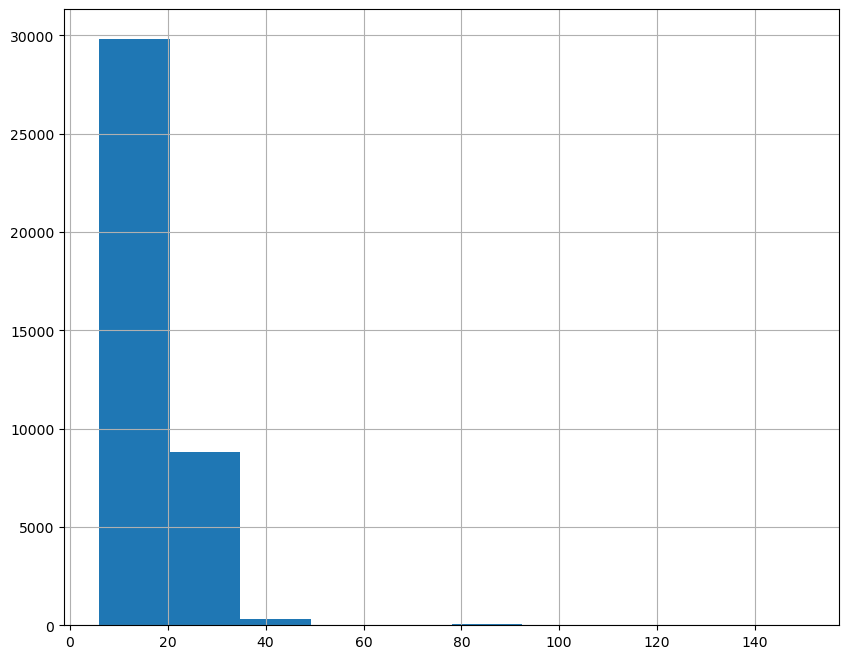

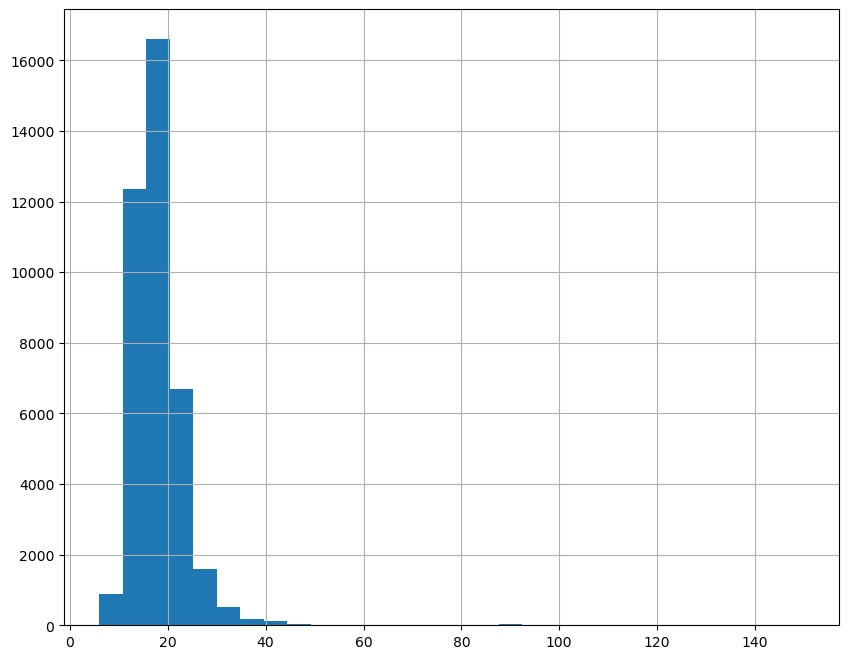

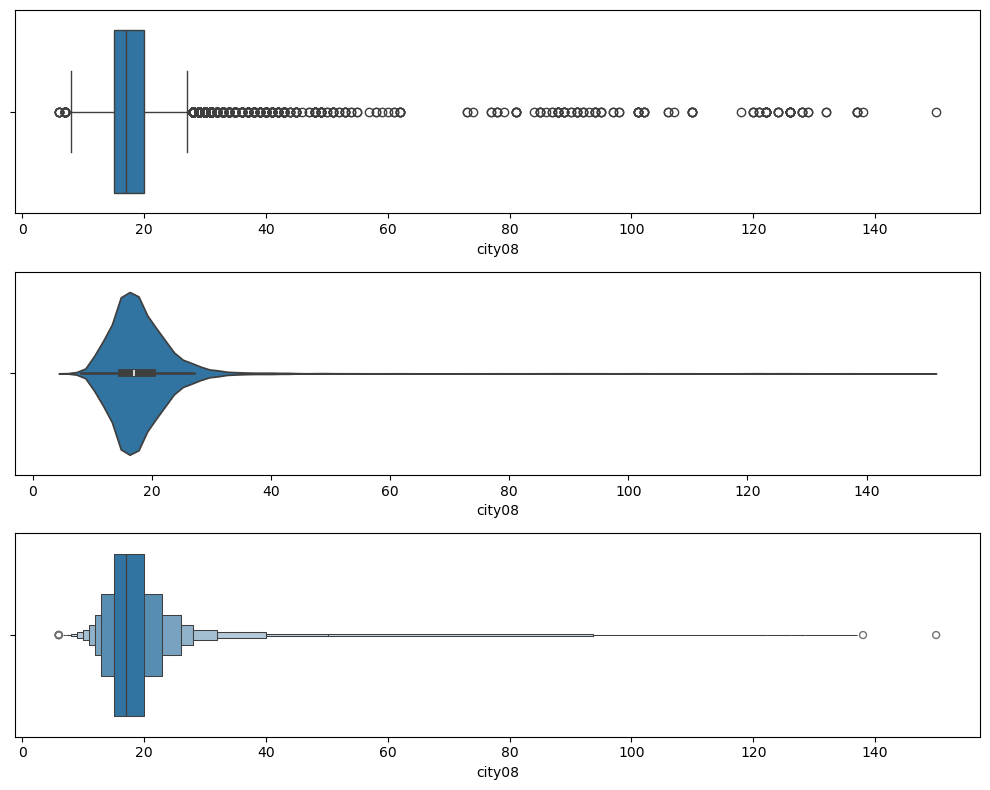

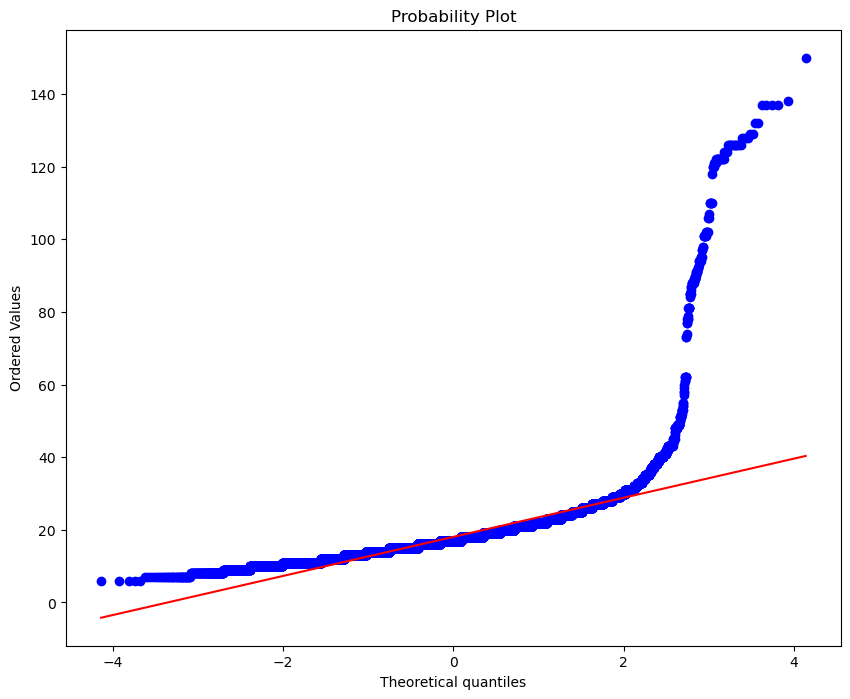

In [98]:
#Continuous Data

#Pick out the columns that are numeric

fueleco.select_dtypes("number")

#Use sample to see some values
fueleco.sample(5, random_state = 42)

#Determine the num and perc of missing values
fueleco.city08.isna().sum()
fueleco.city08.isna().mean() * 100

#Get summary stats 
fueleco.city08.describe().T

#Use pandas to plot histogram
fig, ax = plt.subplots(figsize = (10,8))
fueleco.city08.hist(ax = ax)

#Looks skewed so need to increase number of bins
fig, ax = plt.subplots(figsize = (10,8))
fueleco.city08.hist(ax = ax, bins = 30)

# #Use seaborn
# fig, ax = plt.subplots(figsize = (10,8))
# sns.distplot(fueleco["city08"], rug=True, ax=ax) #Deprecated Function

#Use seaborn for box, vilolin, and boxen plots
fig, axs = plt.subplots(nrows=3, figsize=(10, 8))

sns.boxplot(x=fueleco["city08"], ax=axs[0])
sns.violinplot(x=fueleco["city08"], ax=axs[1])
sns.boxenplot(x=fueleco["city08"], ax=axs[2])
plt.tight_layout()

#Checking if data is normal along the line
# using kolmogorov-smirnov test
from scipy import stats
stats.kstest(fueleco.city08, cdf = "norm")

fig, ax = plt.subplots(figsize=(10, 8))
stats.probplot(fueleco['city08'].dropna(), plot=ax)



((array([-4.1352692 , -3.92687024, -3.81314873, ...,  3.81314873,
          3.92687024,  4.1352692 ]),
  array([  6,   6,   6, ..., 137, 138, 150])),
 (5.385946629915974, 18.077798521776934, 0.772587941459713))

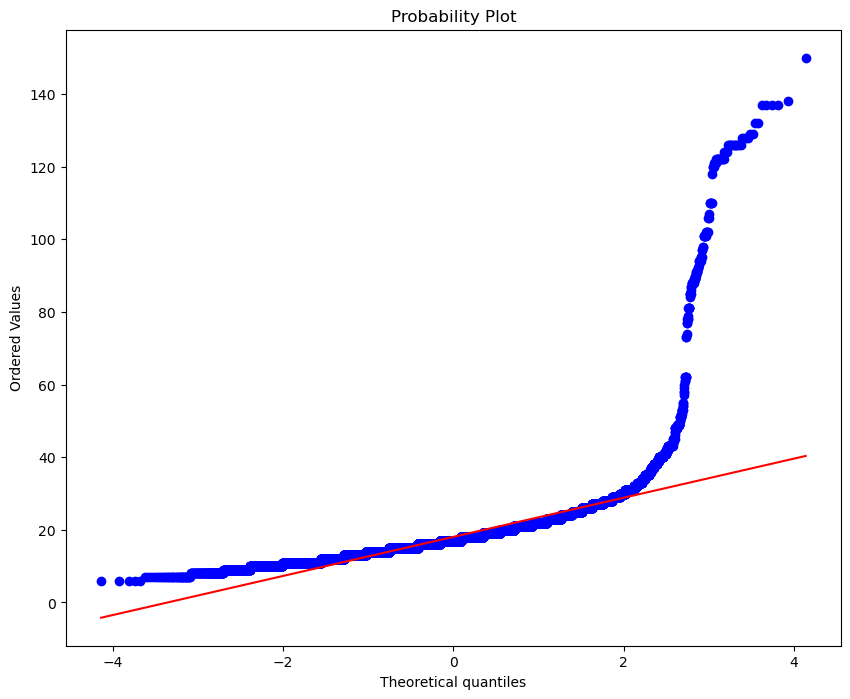

In [97]:
fig, ax = plt.subplots(figsize=(10, 8))
stats.probplot(fueleco['city08'].dropna(), plot=ax)

,mean,std
make,,
BMW,17.817377,7.372907
Ford,16.853803,6.701029
Honda,24.372973,9.154064
Tesla,92.826087,5.538970


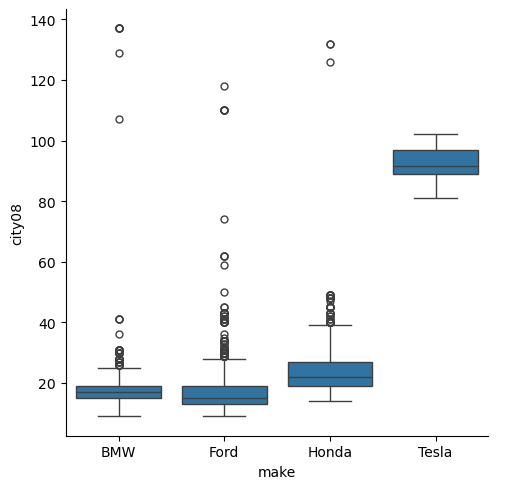

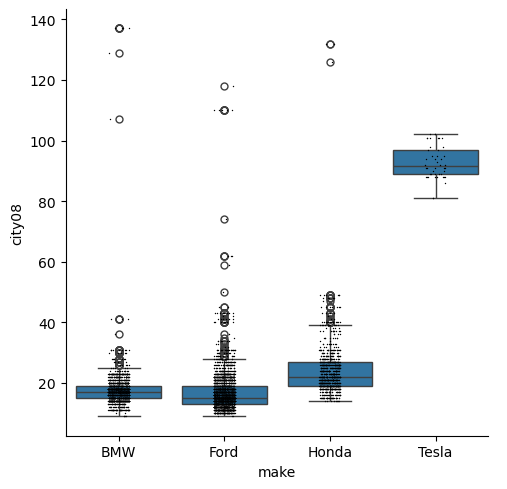

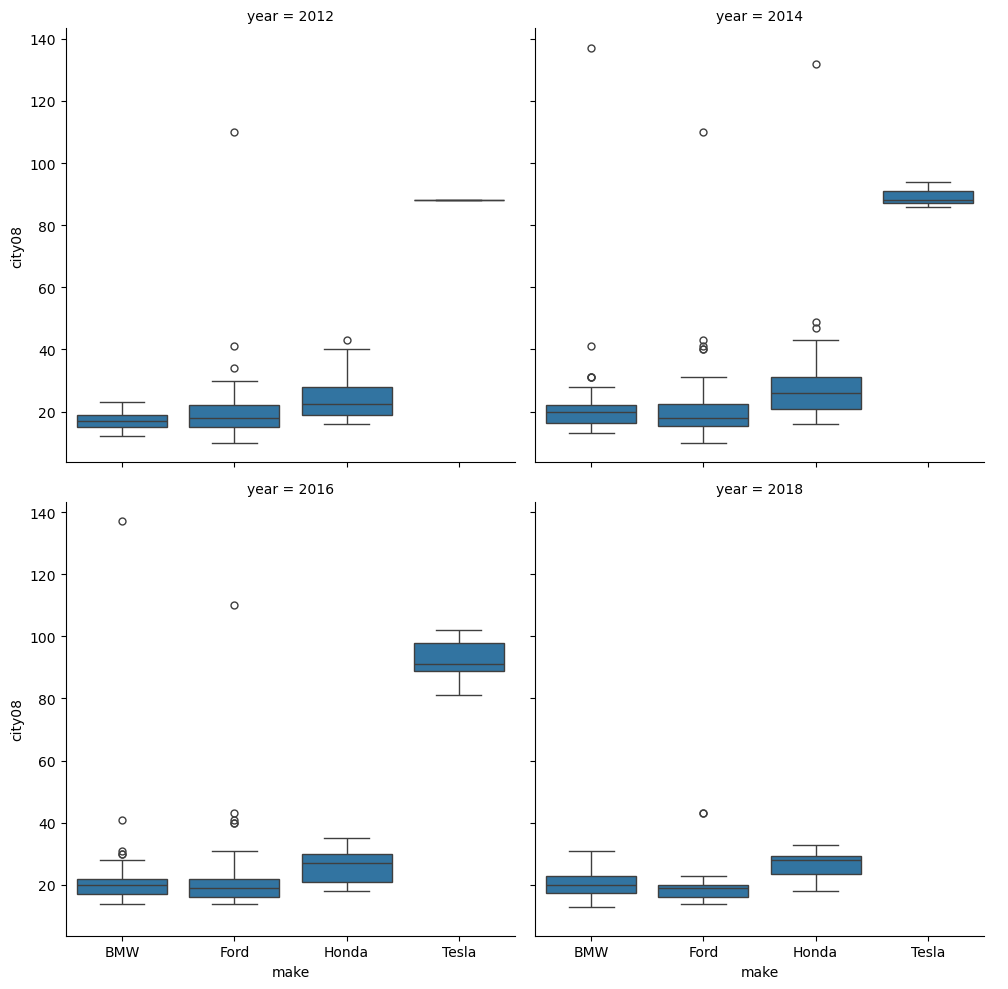

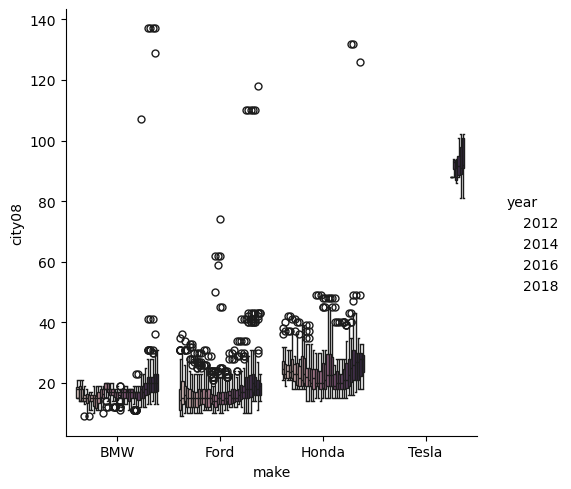

In [125]:
#Comparing Continuous Values Across Categories

#Make a mask for brands we want to look at city08
mask = fueleco.make.isin(["Ford", "Honda", "Tesla", "BMW"])
fueleco[mask].groupby("make").city08.agg(
    ["mean","std"]
)

#visualize city08 values w/ seaborn
g = sns.catplot(
    x = "make", y = "city08", data = fueleco[mask], kind = "box"
)

#Quantifying samples with pandas
mask = fueleco.make.isin(["Ford","Honda","Tesla","BMW"])
fueleco[mask].groupby("make").city08.count()

#Doing a swarm plot on top of box plot is another option
g = sns.catplot(
    x="make", y = "city08", data = fueleco[mask], kind = "box"
)
sns.stripplot(
    x = "make",
    y = "city08",
    data = fueleco[mask],
    color = 'k',
    size = 1, 
    ax = g.ax
)

#USing catplot to plot on 3 dim. by adding col param 
g = sns.catplot(
    x = "make",
    y = "city08",
    data = fueleco[mask],
    kind = "box",
    col = "year",
    col_order = [2012,2014,2016,2018],
    col_wrap = 2
)


#Alternatively, using hue to sep cols. 
g = sns.catplot(
    x = "make",
    y = "city08",
    data = fueleco[mask],
    kind = "box",
    hue = "year",
    hue_order = [2012,2014,2016,2018]
)



#Using style background_gradient to highlight the cells that are extreme
mask = fueleco.make.isin(["Ford","Honda","Tesla","BMW"])
(
    fueleco[mask]
    .groupby("make")
    .city08.agg(["mean","std"])
    .style.background_gradient(cmap = "RdBu", axis = 0)
)


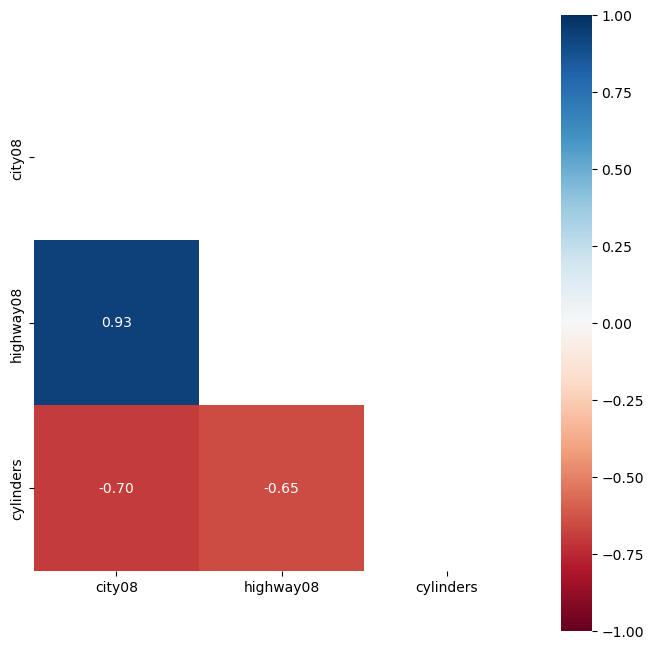

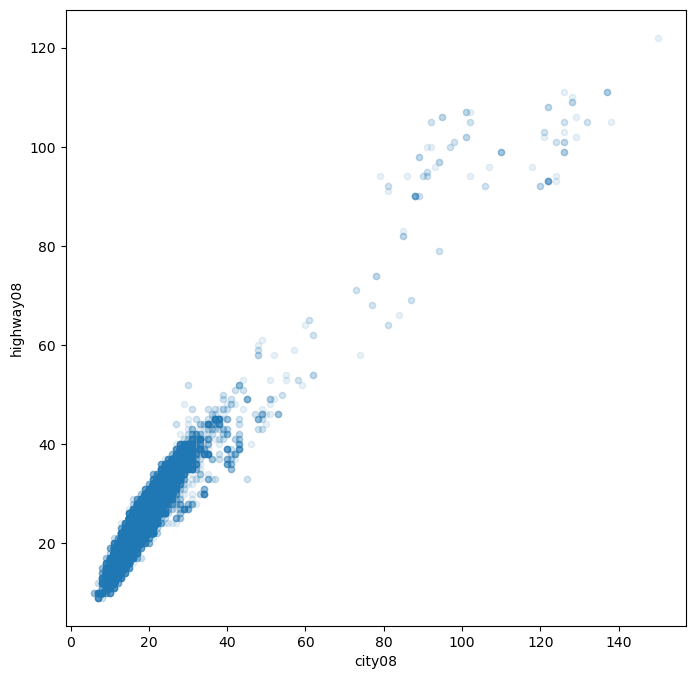

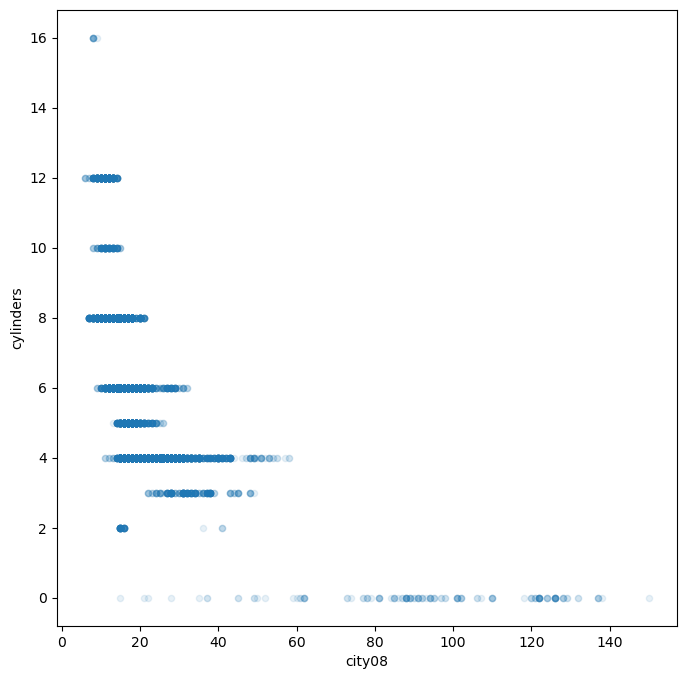

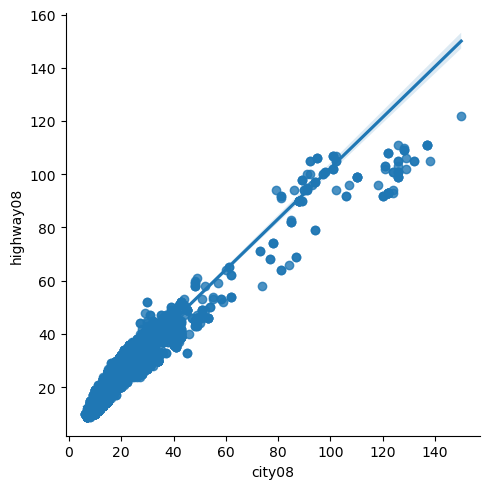

In [ ]:
#Comparing two Continuous Variables

#Look at the covariance of the 2 numbers on same scale
fueleco.city08.cov(fueleco.highway08) #Pos
fueleco.city08.cov(fueleco.comb08)  #Pos
fueleco.city08.cov(fueleco.cylinders) #Neg

#Pearson Correlation
fueleco.city08.corr(fueleco.highway08) # Pos
fueleco.city08.corr(fueleco.cylinders) # Neg

#Visualize the correlation in a heatmap
fig, ax = plt.subplots(figsize = (8,8))
corr = fueleco[
    ["city08", "highway08","cylinders"]
].corr()
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(
    corr, 
    mask = mask, 
    fmt = ".2f", 
    annot = True,
    ax = ax, 
    cmap = "RdBu",
    vmin = -1,
    vmax = 1,
    square = True
)

#Use pandas to scatterplot the relationship 
fig, ax = plt.subplots(figsize = (8,8))
fueleco.plot.scatter(
    x = "city08", y = "highway08", alpha = 0.1, ax = ax
)

#fix missing values of cylinders for elec. cars
fueleco.cylinders.isna().sum()

fig, ax = plt.subplots(figsize = (8,8))
(
    fueleco.assign(
        cylinders = fueleco.cylinders.fillna(0)
    ).plot.scatter(
        x = "city08", y = "cylinders", alpha = 0.1, ax = ax
    )
)

#Use seaborn to add regression line
res = sns.lmplot(
    x = "city08", y = "highway08", data = fueleco
)

